In [717]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras.applications.vgg16 import VGG16

In [718]:
images = []
image_classes = []

for i in range(len(classes)):
    imagePaths = glob.glob('./dataset/images/' + classes[i][0] + '/*.jpg') 
    count = 0
    for imgPath in imagePaths:
            count += 1
            if count < 3:
                img = Image.open(imgPath).convert("RGB")
                img = img.resize((200, 200))
                img.load()
                data = np.asarray(img, dtype="int32")
                images.append(data)
                image_classes.append(i)

        
images = np.array(images)
image_classes = np.array(image_classes)

print(images.shape)
print(image_classes.shape)

(388, 200, 200, 3)
(388,)


In [719]:
x_train, x_test, y_train, y_test = train_test_split(images, image_classes)

In [720]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (291, 200, 200, 3)
y_train shape: (291,)
x_test shape: (97, 200, 200, 3)
y_test shape: (97,)
291 train samples
97 test samples


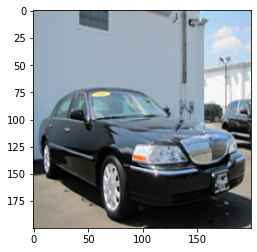

In [721]:
plt.imshow(x_train[15])

In [722]:
y_train = tf.keras.utils.to_categorical(y_train, len(classes))
y_test = tf.keras.utils.to_categorical(y_test, len(classes))

In [723]:
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [724]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train)
print(x_test)

[[[[0.99215686 0.99215686 0.98039216]
   [0.8901961  0.99215686 0.9764706 ]
   [0.78039217 0.99607843 0.972549  ]
   ...
   [0.09019608 0.1764706  0.05882353]
   [0.12156863 0.21568628 0.07058824]
   [0.12941177 0.22352941 0.05490196]]

  [[0.9882353  0.99607843 0.98039216]
   [0.93333334 0.99215686 0.9764706 ]
   [0.8        0.99215686 0.972549  ]
   ...
   [0.16078432 0.20392157 0.18431373]
   [0.25882354 0.2784314  0.25490198]
   [0.31764707 0.3254902  0.25882354]]

  [[0.9843137  0.99607843 0.98039216]
   [0.9647059  0.99607843 0.98039216]
   [0.84313726 0.99215686 0.98039216]
   ...
   [0.18431373 0.22352941 0.2627451 ]
   [0.21568628 0.2509804  0.2784314 ]
   [0.23529412 0.25490198 0.27058825]]

  ...

  [[0.67058825 0.627451   0.5882353 ]
   [0.56078434 0.5176471  0.47843137]
   [0.43137255 0.3882353  0.37254903]
   ...
   [0.6862745  0.64705884 0.627451  ]
   [0.6862745  0.65882355 0.64705884]
   [0.69411767 0.6745098  0.64705884]]

  [[0.5568628  0.5058824  0.47058824]
   [0.5

In [725]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

model = Sequential()

for layer in vgg_model.layers:
  model.add(layer)

model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 50, 50, 256)     

In [726]:
for layer in model.layers:
  layer.trainable = False

In [727]:
# model.add(Dense(128, activation="relu"))
model.add(Flatten())
model.add(Dense(len(classes), activation="softmax"))

In [728]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 50, 50, 256)     

In [ ]:
opt = SGD(learning_rate=0.001, momentum=0.9)
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=opt)

model.fit(x_train, y_train, epochs=100, verbose=1 ,callbacks=[monitor], validation_data=(x_test, y_test))

Train on 291 samples, validate on 97 samples
Epoch 1/100


In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test ,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Precision: {}'.format(score))

r1 = metrics.recall_score(y_true, pred, average='weighted')
print('Recall : {}'.format(r1))

f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

print(metrics.classification_report(y_true, pred))

In [ ]:
fig = plt.figure(figsize=(20, 20))

rows = 5

images = x_test[0:rows];

for i in range(len(images)):
  fig.add_subplot(rows, 1, i+1)

  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title("True Labels: {} \n Predicted Labels: {}".format(classes[y_true[i]][0], classes[pred[i]][0]))